In [11]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [5]:
# website url
url = 'https://www.pro-football-reference.com/teams/'

# nfl team abbreviations for website generator loop
nfl_abbrv = ['crd', 'atl', 'rav', 'buf', 'car', 'chi', 'cin', 'cle', 'dal', 'den', 'det', 'gnb', 'htx', 'clt', 'jax', 'kan', 'rai', 'sdg', 'ram', 'mia', 'min', 'nwe', 'nor', 'nyg', 'nyj', 'phi', 'pit', 'sfo', 'sea', 'tam', 'oti', 'was']

In [ ]:
# creates empty list of dataframes
list_of_dataframes = []

# loops through the abbreviations to create link for each teams webpage on pro-football-reference
for a in nfl_abbrv:
    link = url + a + "/2021.htm" 

    # set the dataframe to variable df and read the table Schedule and Game Results, index = 1
    df = pd.read_html(link)[1]

    # added time,3s, loop needs to wait before accessing webpage to avoid accidental HTTP error or DDOS, website limited to 20 requests per minute
    time.sleep(3)
    # print statement so user knows what the loop is doing...
    print(a + "'s table in list of dataframes!")

    # appends each dataframe to include 'team_name' from nfl_abbrv
    df['team_name'] = a

    # appends list of dataframes with each df generated from the pandas.read_html
    list_of_dataframes.append(df)

In [ ]:
# creates final_df which concatenates all 32 teams dataframes 
final_df = pd.concat(list_of_dataframes)

# grabs columns and removes multi index column by dropping level 0 on columns
final_df.columns = final_df.columns.droplevel(0)

# resets index to be singular index since we dropped the level previous
final_df = final_df.reset_index()

In [ ]:
# changes names of all columns in final dataframe
final_df.columns = ['index', 'week', 'day', 'date', 'time', 'boxscore', 'result', 'OT', 'Record', 'Home_or_away', 'Opponent', 'Points_scored', 'Points_allowed', 'Off_1stD', 'Off_TotYd', 'Off_PassY', 'Off_RushY', 'Off_TO', 'Opp_1stD', 'Opp_TotYd', 'Opp_PassY', 'Opp_RushY', 'Opp_TO', 'Off_EPA', 'Def_EPA', 'Sp_Tm_EPA', 'Team_name']

# removes unwanted columns preparing table for models, (axis = 1 indicated columns/axis = 0 indicates rows)
final_df = final_df.drop(['index', 'time', 'boxscore', 'OT', 'Record', 'Off_EPA', 'Def_EPA', 'Sp_Tm_EPA'], axis=1)

In [ ]:
# Removes all rows that do not have game data eg. Playoff divider and Bye Week Divider
final_df = final_df.drop(final_df[(final_df['week'] == 'Wild Card') | (final_df['week'] == 'Division') | (final_df['week'] == 'Conf. Champ.') | (final_df['week'] == 'SuperBowl') | (final_df['Opponent'] == 'Bye Week') | (final_df['date'] == 'Playoffs')].index)

In [ ]:
# send dataframe to csv to avoid constantly scraping profootballreference.com constantly
# make sure to change the string to reflect the location on your own storage device
final_df.to_csv(r'C:\Users\Rodrigo Cracel\Desktop\Nfl_data.csv')

In [12]:
# open formatted nfl data from desktop
# make sure to change the string to reflect the location on your own storage device
Nfl_df = pd.read_csv(r'C:\Users\Rodrigo Cracel\Desktop\Nfl_data.csv')

In [ ]:
# gives an idea of which columns are most correlated to make plots
Nfl_df.corr()

In [13]:
# team colors set in hexadecimal codes for pretty graphs
team_colors = {
    'crd':'#97233F',
    'atl':'#A71930',
    'rav':'#241773',
    'buf':'#00338D',
    'car':'#0085CA',
    'chi':'#0B162A',
    'cin':'#FB4F14',
    'cle':'#311D00',
    'dal':'#003594',
    'den':'#FB4F14',
    'det':'#0076B6',
    'gnb':'#203731',
    'htx':'#03202F',
    'clt':'#002C5F',
    'jax':'#006778',
    'kan':'#E31837',
    'rai':'#000000',
    'sdg':'#0080C6',
    'ram':'#003594',
    'mia':'#008E97',
    'min':'#4F2683',
    'nwe':'#002244',
    'nor':'#D3BC8D',
    'nyg':'#0B2265',
    'nyj':'#125740',
    'phi':'#004C54',
    'pit':'#FFB612',
    'sfo':'#AA0000',
    'sea':'#002244',
    'tam':'#D50A0A',
    'oti':'#0C2340',
    'was':'#5A1414'

}


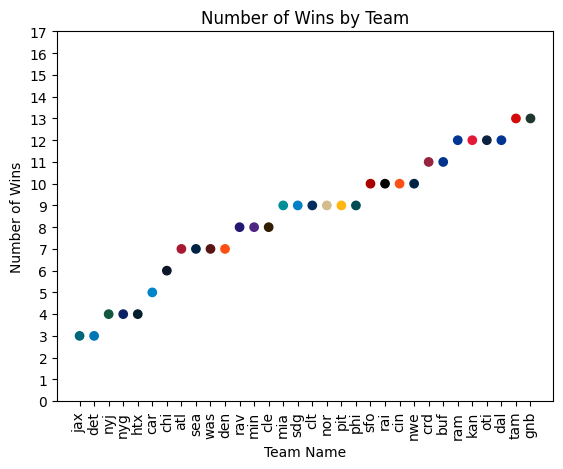

In [4]:
# Now that we have the table formatted how we want it to look
# It's time to analyze the data
# This takes the result column that contains "W" and "L" and sums the wins to see the top teams of the 2021 season.
wins_per_team = Nfl_df.loc[Nfl_df['result'] == 'W'].groupby('Team_name')['result'].count()

# Now we take our wins_per_team and sort by wins desc
# When printed we see the GNB, TAM, RAM were tied as the 3 best teams in the NFL in 2021
wins_sorted = wins_per_team.sort_values(ascending=True).reset_index()

# Reset index to prepare series for visualization
wins_sorted = wins_sorted.rename(columns={'Team_name' : 'Team_name', 'result' : 'number_of_wins'})
# uncomment the print statement below to see the list of best teams desc
# print(wins_sorted)

# creates a wins and team_name variable to begin manipulating the series
wins= wins_sorted.number_of_wins
team_name = wins_sorted.Team_name
# loop to save team colors in the order the team names will appear in this plot
colors = [team_colors[team] for team in team_name]

# creates a scatter plot with team_name as the X and wins as the Y and includes team colors as colors
plt.scatter(team_name, wins, color=colors)
# creates labels for appropriate axis
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')
# creates title for plot
plt.title('Number of Wins by Team')
# sets x axis to have all 32 teams labeled for each dot and rotates each team name 90 degrees so they are readable
plt.xticks(range(len(team_name)), team_name, rotation =90)
# sets y axis to have a maximum of 17 ticks counting by 1
plt.yticks(range(0,18,1), range(0,18,1))
# shows plot without excess output
plt.show()

# its clear that GNB and TAM are the two top teams in the NFL followed by a four way tie for third place from DAL, OTI, KAN, and RAM

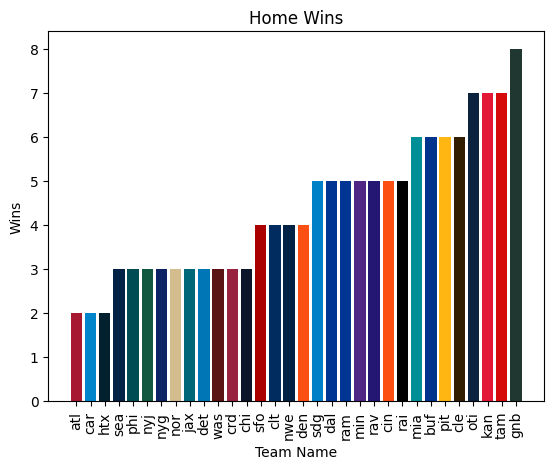

In [14]:
# Lets check out the best teams at home
# Separates data frame into Home games, home games were null in the column while away games were designated by '@'
home_df = Nfl_df.loc[Nfl_df['Home_or_away'].isna()]
# Where result is a W (win) grouped by team_names to count how many wins each team got during Home games
home_df = home_df.loc[home_df['result'] == 'W'].groupby('Team_name')['result'].count()
# sorts values to be ascending by number of wins
home_df_sorted = home_df.sort_values(ascending=True).reset_index()

# sets column team_name to variable team_name
team_name = home_df_sorted.Team_name
# sets column result to varibale wins
wins = home_df_sorted.result
# loop to save team colors in the order the team names will appear in this plot
colors = [team_colors[team] for team in team_name]

# calls bar graph with team_name as x and count of wins as y and includes team colors as colors
plt.bar(team_name, wins, color=colors)
# sets label of x axis
plt.xlabel('Team Name')
# sets label of y axis
plt.ylabel('Wins')
# sets title of graph to Home Wins
plt.title('Home Wins')
# sets tick marks to include all teams and rotate the names by 90 degrees for readability
plt.xticks(range(len(team_name)), team_name, rotation=90)
plt.show()
# GNB is the lone team winning all 8 home games not surprising considering they were at the top of the pack for wins tied with TAM
# ATL and CAR won two of their 6 and 5 respective games at home, tied with HTX as the worst Home teams
# JAX, NYG, and NYJ were the three worst teams in the league, but all their wins came at home. Clearly there is an advantage from playing in front of the home crowd

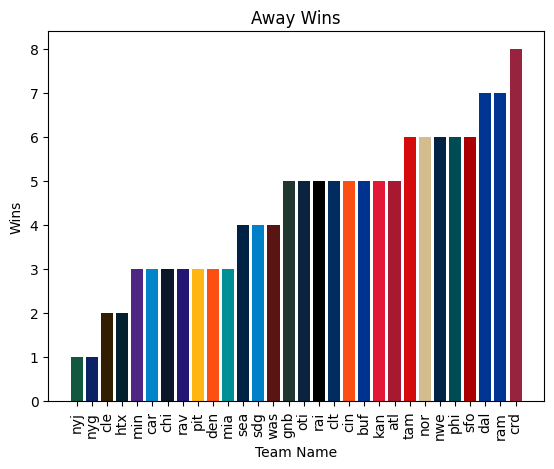

In [15]:
# Let's look at best Away Teams next
# This time separating for away games denoted using the @ symbol
away_df = Nfl_df.loc[Nfl_df['Home_or_away'] == '@']
# separated for winning results and grouped by team_name, then counted each result by team
away_df = away_df.loc[away_df['result'] == 'W'].groupby('Team_name')['result'].count()
# sort away wins per team to be ascending for the graph
away_df_sorted = away_df.sort_values(ascending=True).reset_index()
# set column team_name to variable
team_name = away_df_sorted.Team_name
# set column count of wins to variable wins
wins = away_df_sorted.result
# loop to save team colors in the order the team names will appear in this plot
colors = [team_colors[team] for team in team_name]

# calls bar graph with team_name as x and count of wins as y and includes team colors as colors
plt.bar(team_name, wins, color=colors)
# labels x axis with Team Name
plt.xlabel('Team Name')
# labels y axis with Wins
plt.ylabel('Wins')
# sets title of graph to away wins
plt.title('Away Wins')
# sets tick marks to include all teams and rotate the names by 90 degrees for readability
plt.xticks(range(len(team_name)), team_name, rotation=90)
plt.show()

# Very interesting results from the Away Wins
# CRD won 8 of their 11 wins away from home, counterintuitive to the point made earlier about Home field-advantage
# We see some of the top teams like DAL, RAM, SFO, TAM at the top of this list, but also PHI, NWE, and NOR won around 2/3's of their games away from home. Good teams win at home but great teams win away consistently!

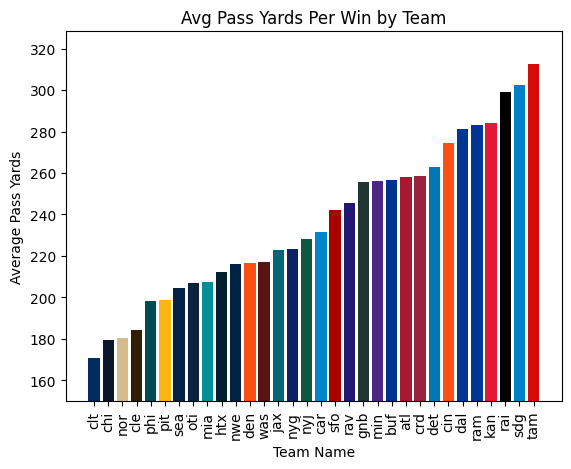

In [6]:
# Now to see Pass Yards on average during Winning games for each team
pass_y_wins = Nfl_df.loc[Nfl_df['result'] == 'W'].groupby('Team_name')['Off_PassY'].mean()

# sorts the pass yards to be ascending 
pass_y_wins_sorted = pass_y_wins.sort_values(ascending=True).reset_index()

# Renames columns to make them easier to call
pass_y_wins_sorted = pass_y_wins_sorted.rename(columns={'Team_name':'Team_name', 'Off_PassY':'Avg_Pass_Yards'})
# saves column team_name to variable team_name
team_name = pass_y_wins_sorted.Team_name
# saves column avg_pass_yards to Pass_Y
Pass_Y = pass_y_wins_sorted.Avg_Pass_Yards
# loop to save team colors in the order the team names will appear in this plot
colors = [team_colors[team] for team in team_name]

# calls a bar graph with team_name as the x and avg_pass_yards as the y and includes team colors as colors
plt.bar(team_name, Pass_Y, color=colors)
# changes x label of graph
plt.xlabel('Team Name')
# changes y label of graph
plt.ylabel('Average Pass Yards')
# sets title of graph to 
plt.title('Avg Pass Yards Per Win by Team')
# sets tick marks to include all teams and rotate the names by 90 degrees for readability
plt.xticks(range(len(team_name)), team_name, rotation=90)
# sets lower bound of y axis to be 150 to show more nuance between bars
plt.ylim(150)
plt.show()

# TAM was the top passing offense in games they won by an average of about 10 yards. This is to be expected as 2021 was one of Tom Brady's best seasons overall
# SDG with Justin Herbert RAI with Derek Carr KAN with Patrick Mahomes and eventual SuperBowl Champions RAM with Matthew Stafford round out the top five passing teams

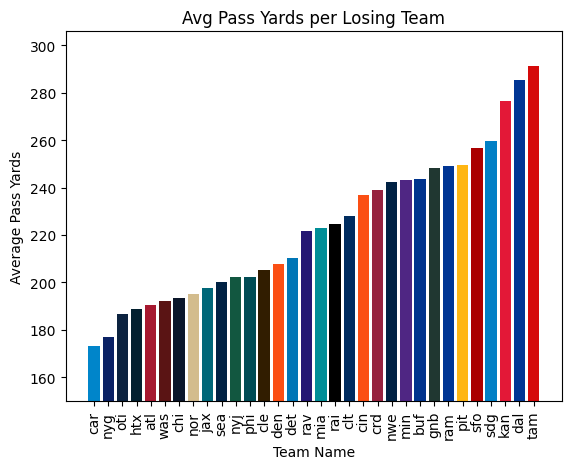

In [39]:
# How about passing yard when the team loses?
pass_y_loss = Nfl_df.loc[Nfl_df['result'] == 'L'].groupby('Team_name')['Off_PassY'].mean()

# sorts values of pass yards to be ascending
pass_y_loss_sort = pass_y_loss.sort_values(ascending=True).reset_index()

# renames columns to make them easier to call
pass_y_loss_sort =pass_y_loss_sort.rename(columns={'Team_name':'Team_name', 'Off_PassY':'Avg_Pass_Yards'})
# sets column team_name to variable for plotting
team_name = pass_y_loss_sort.Team_name
# sets column avg_pass_yards to variable for plotting
Pass_Y = pass_y_loss_sort.Avg_Pass_Yards
# loop to save team colors in the order the team names will appear in this plot
colors = [team_colors[team] for team in team_name]

# calls bar graph with team_name as x and avg_pass_yards as the y and includes team colors as colors
plt.bar(team_name, Pass_Y, color=colors)
# sets x axis label
plt.xlabel('Team Name')
# sets y axis label
plt.ylabel('Average Pass Yards')
# sets title of graph
plt.title('Avg Pass Yards per Losing Team')
# sets tick marks to include all teams and rotate the names by 90 degrees for readability
plt.xticks(range(len(team_name)), team_name, rotation=90)
# sets lower bound of y tick to 150 to show minute differences in bars
plt.ylim(150)
plt.show()

# TAM remains the top passing team in the league even in losses. However, their average passing yards drop by nearly 30 yards when they lose.
# Interestingly, DAL averaged MORE yards during losses than Wins. This could be explained by DAL losing throughout the whole game causing them to adopt a more passing approach.
# CLT also averaged almost double their passing yards in losses rather than wins. This phenomenon can be explained by having MVP candidate Jonathan Taylor at running back, when he's having a good game they need to pass less

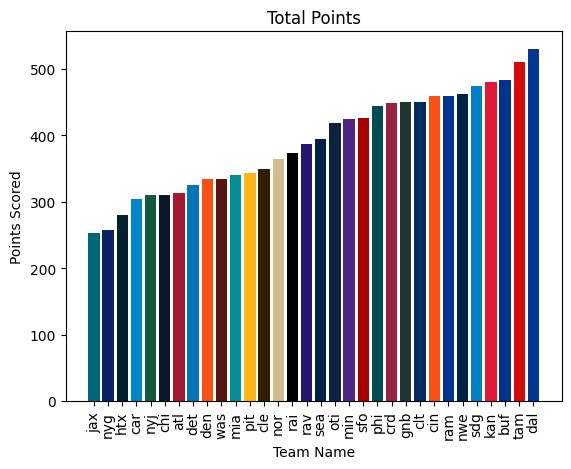

In [42]:
# Total points should indicate the best offenses in the NFL.
# Another group by team_name and summing the points scored, isolating points scored and team_name for the graph
total_points_df = Nfl_df.groupby('Team_name')['Points_scored'].sum()
# sorts teams by points scored ascending for the plot
total_points_sorted = total_points_df.sort_values(ascending=True).reset_index()

# set column team_name to variable
team_name = total_points_sorted.Team_name
# set column points_scored to variable
points = total_points_sorted.Points_scored
# loop to save team colors in the order the team names will appear in this plot
colors = [team_colors[team] for team in team_name]

# calls bar graph with team_name as x and total points as the y and includes team colors as colors
plt.bar(team_name, points, color=colors)
# labels x axis
plt.xlabel('Team Name')
# labels y axis
plt.ylabel('Points Scored')
# sets title of graph to Total Points
plt.title('Total Points')
# sets tick marks to include all teams and rotate the names by 90 degrees for readability
plt.xticks(range(len(team_name)), team_name, rotation=90)
plt.show()

# Interesting to see JAX has the fewest wins and fewest points scored! Followed by NYG who had the second lowest point total and tied-lowest win total.
# DAL and TAM were tied in second and first in win totals and sit at the top of the points table. No coincidence there!

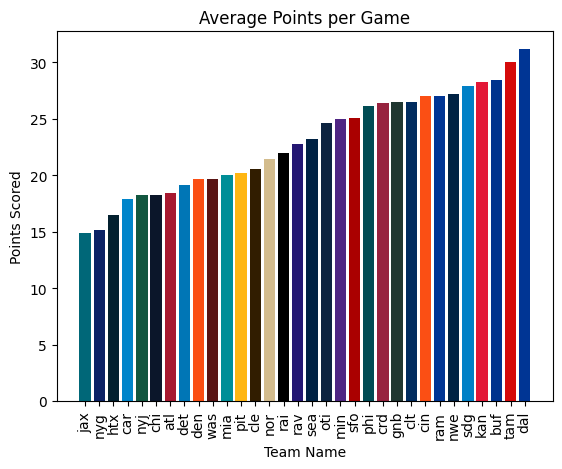

In [43]:
# How many points on average did teams score?
# dataframe grouped by team_name while measuring average of points scored
avg_points_df = Nfl_df.groupby('Team_name')['Points_scored'].mean()
# sorts values as ascending
avg_sort = avg_points_df.sort_values(ascending=True).reset_index()

# sets column team_name to variable
team_name = avg_sort.Team_name
# sets colum points_scored to variable
avg_points = avg_sort.Points_scored
# loop to save team colors in the order the team names will appear in this plot
colors = [team_colors[team] for team in team_name]

# calls bar graph with team_name as x and avg_points as y and includes team colors as colors
plt.bar(team_name, avg_points, color=colors)
# labels x axis
plt.xlabel('Team Name')
# labels y axis
plt.ylabel('Points Scored')
# sets plot title to Average Points per Game
plt.title('Average Points per Game')
# sets tick marks to include all teams and rotate the names by 90 degrees for readability
plt.xticks(range(len(team_name)), team_name, rotation=90)
plt.show()

# These results are the same as the previous graph just scaled to double digit per game totals rather than overall point totals.

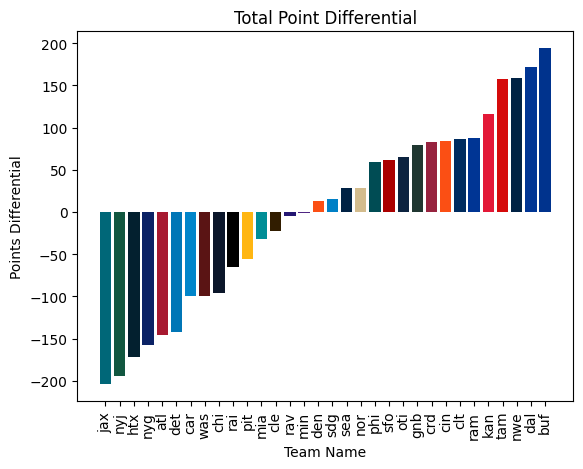

In [8]:
# Do the results stay the same when we look at point differential?
# group by team_name and while taking the sum of points scored and points allowed
point_diff = Nfl_df.groupby('Team_name')[['Points_scored', 'Points_allowed']].sum()
# setting column point_differential to be equal to columns points_scored subtracted by points_allowed, the basic formula for point differential
point_diff['Point_differential'] = point_diff['Points_scored'] - point_diff['Points_allowed']
# sort values of point differential column ascending for plot
diff_sort = point_diff.sort_values('Point_differential', ascending=True).reset_index()

# sets column team_name to variable
team_name = diff_sort.Team_name
# sets column point_differential to variable
differential = diff_sort.Point_differential
# loop to save team colors in the order the team names will appear in this plot
colors = [team_colors[team] for team in team_name]

# calls bar graph with team_name as x and point differential as y and includes team colors as colors
plt.bar(team_name, differential, color=colors)
# labels x axis
plt.xlabel('Team Name')
# labels y axis
plt.ylabel('Points Differential')
# sets title of graph to Total Point Differential
plt.title('Total Point Differential')
# sets tick marks to include all teams and rotate the names by 90 degrees for readability
plt.xticks(range(len(team_name)), team_name, rotation=90)
plt.show()

# No surprses here to see the top teams being BUF, DAL, TAM, KAN, and RAM near the top as they were the top offenses.
# Interesting to see middle of the pack teams like CLE, RAV, MIN sitting right around 0 for point differential.

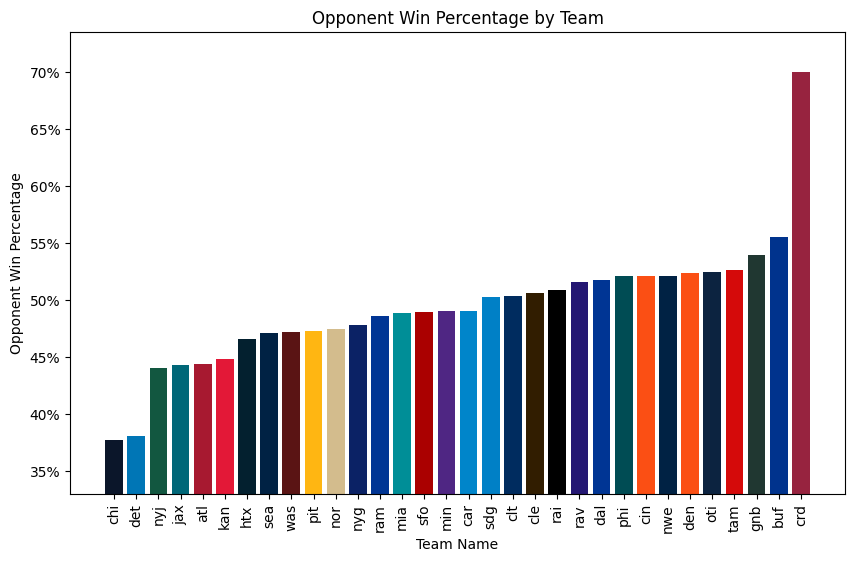

In [10]:
# Lets check the strength of schedule for all teams. Strength of schedule refers to the combined win percentage of one team's opponents
# create dictionary to store the total record of opponents for each team
opp_totals = {}

# create dictionary to store the record of each opponent
opp_records = {}

# iterate over each row in the dataframe
for index, row in Nfl_df.iterrows():
    team = row['Team_name']
    opp = row['Opponent']
    result = row['result']
    
    # if team not in dictionary, add it and initialize its record to [0,0,0]
    if team not in opp_totals:
        opp_totals[team] = [0,0,0]
    
    # if opponent not in dictionary, add it and initialize its record to [0,0,0]
    if opp not in opp_records:
        opp_records[opp] = [0,0,0]
    
    # update opponent's record based on game result
    if result == "W":
        opp_records[opp][0] += 1  # opponent wins
    elif result == "L":
        opp_records[opp][1] += 1  # opponent losses
    else:
        opp_records[opp][2] += 1  # opponent ties
    
    # add opponent's record to the team's totals
    opp_totals[team][0] += opp_records[opp][0]  # opponent wins
    opp_totals[team][1] += opp_records[opp][1]  # opponent losses
    opp_totals[team][2] += opp_records[opp][2]  # opponent ties

# create a list of team names and their opponent win percentages
team_name = []
opp_win_pcts = []
for team, record in opp_totals.items():
    opp_wins = record[0]
    opp_losses = record[1]
    opp_ties = record[2]
    opp_total_games = opp_wins + opp_losses + opp_ties
    opp_win_pct = round(opp_wins / opp_total_games, 3) if opp_total_games > 0 else 0
    team_name.append(team)
    opp_win_pcts.append(opp_win_pct)

# define function to format y-tick labels as percentages
def to_percent(y, position):
    return f'{y:.0%}'

# sort dictionary by opponent win percentage in ascending order
sorted_opp_totals = sorted(opp_totals.items(), key=lambda x: x[1][0] / sum(x[1]), reverse=False)

# create lists of team names and opponent win percentages
team_name = [team for team, record in sorted_opp_totals]
opp_win_pcts = [record[0] / sum(record) for team, record in sorted_opp_totals]

# create bar chart
colors = [team_colors[team] for team in team_name]
plt.figure(figsize=(10, 6))
# calls bar chart with team_name as x and opposing win percentages as y and includes team colors as colors
plt.bar(team_name, opp_win_pcts, color=colors)

# format y-tick labels as percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

# set axis labels and title
plt.xlabel('Team Name')
plt.ylabel('Opponent Win Percentage')
plt.title('Opponent Win Percentage by Team')
# rotate the names by 90 degrees for readability
plt.xticks(rotation=90)
# sets the lower bound of y tick marks to 33% since no team is below 35%
plt.ylim(.33)
plt.show()

# Shocking results here starting with the lowest side of win percentage. JAX, NYJ, CHI, and DET were some of the worst teams in the league despite having some of the easiest schedules.
# Clearly their opponents had no bearing on how poor their results were.
# On the opposite end, CRD had the best strength of schedule by far. This could be slightly skewed by playing RAM, SFO, SEA each twice, who all had above 7 wins. Although this did not affect them, as they still won 11 games!
# KAN who had 12 wins played the 6th easiest schedule and clearly benefitted from it. No coincidence that they finished top 5 in point differential as well. They were beating up on weaker teams for most of the season.